In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [51]:
df=pd.read_csv('../MachineLearning/med-insurance.csv')

In [52]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [54]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


d:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

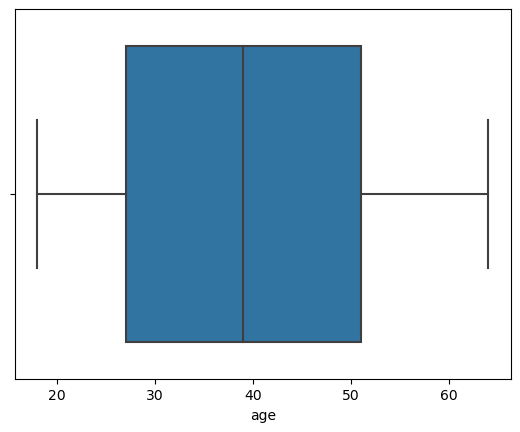

In [55]:
sns.boxplot(df['age'])

d:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

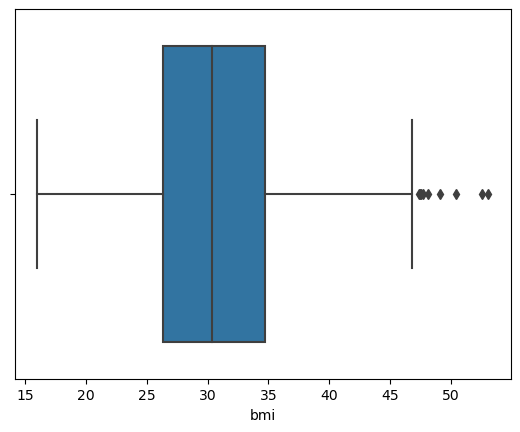

In [56]:
sns.boxplot(df['bmi'])

d:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children'>

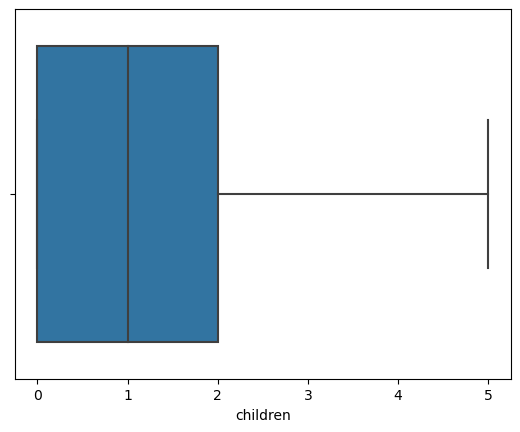

In [57]:
sns.boxplot(df['children'])

In [58]:
from sklearn.preprocessing import LabelEncoder

labl_encoder=LabelEncoder()

df['sex']=labl_encoder.fit_transform(df['sex'])
df['smoker']=labl_encoder.fit_transform(df['smoker'])
df['region']=labl_encoder.fit_transform(df['region'])

In [59]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [60]:
df.describe()

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.665471,1.094918,0.204783,1.515695,13270.422414
std,14.049960,0.500160,6.098382,1.205493,0.403694,1.104885,12110.011240
min,18.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,1.000000,4740.287500
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.030000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16639.915000
max,64.000000,1.000000,53.100000,5.000000,1.000000,3.000000,63770.430000


<AxesSubplot:>

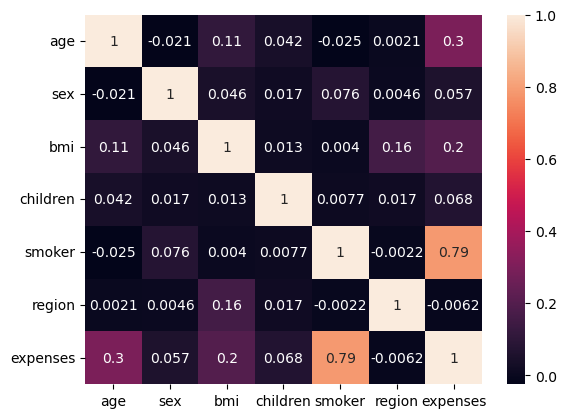

In [61]:
sns.heatmap(df.corr(),annot=True)

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [63]:
X=df.drop(['expenses'],axis=1).values
Y=df['expenses'].values

In [64]:
X

array([[19. ,  0. , 27.9,  0. ,  1. ,  3. ],
       [18. ,  1. , 33.8,  1. ,  0. ,  2. ],
       [28. ,  1. , 33. ,  3. ,  0. ,  2. ],
       ...,
       [18. ,  0. , 36.9,  0. ,  0. ,  2. ],
       [21. ,  0. , 25.8,  0. ,  0. ,  3. ],
       [61. ,  0. , 29.1,  0. ,  1. ,  1. ]])

In [65]:
Y

array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.95, 29141.36])

In [66]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [67]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [68]:
line_reg=LinearRegression()
line_reg.fit(X_train,Y_train)

LinearRegression()

In [69]:
pred=line_reg.predict(X_test)

In [70]:
pred

array([ 8931.64285422,  7108.65837503, 36911.24588592,  9492.1867315 ,
       27005.51458817, 10792.51319722,   219.4619664 , 16940.94699877,
        1057.14434333, 11271.11976436, 28047.33508408,  9427.63503125,
        5329.25523971, 38478.07916194, 40296.31673179, 37133.86645401,
       15296.29024458, 35954.44751436,  9194.99722747, 31513.44163793,
        3798.1729981 , 10071.14543504,  2312.23330804,  7073.55061039,
       11345.29924351, 12913.60653244, 14448.42340264,  6206.0789747 ,
        9916.03458141,  2225.63567221,  9061.06174806, 13111.1535072 ,
        4627.96439893,  3483.42431425,  4402.58881377, 12966.72664374,
        1926.72036749,  8757.35074335, 33311.61922648, 32638.00629978,
        3853.56310911,  4387.19570727, 14080.89095373, 11490.10719794,
        8846.99095184, 12045.0041818 ,  5313.39203076,  3100.3272096 ,
       35556.95223675,  9206.35674505, 15893.88802705,  2415.94128125,
       12391.98367335,  1424.32310327, 13437.63031252, 12516.11125483,
      

In [71]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(Y_test,pred))

0.7833214205203847


In [73]:
print('train score =',line_reg.score(X_train,Y_train))
print('test score = ',line_reg.score(X_test,Y_test))

train score = 0.7417300723597997
test score =  0.7833214205203847
